In [3]:
from glob import glob
from os.path import basename
result_pickles = glob("/data2/shinzato/rbm/neuron_firings/*.pickle")
result_pickles

['/data2/shinzato/rbm/neuron_firings/hid_1024.k_1.optim_sgd.pickle',
 '/data2/shinzato/rbm/neuron_firings/hid_256.k_1.optim_sgd.pickle',
 '/data2/shinzato/rbm/neuron_firings/hid_256.k_1.optim_adam.pickle',
 '/data2/shinzato/rbm/neuron_firings/hid_256.k_2.optim_sgd.pickle',
 '/data2/shinzato/rbm/neuron_firings/hid_256.k_2.optim_adam.pickle',
 '/data2/shinzato/rbm/neuron_firings/hid_256.k_3.optim_sgd.pickle',
 '/data2/shinzato/rbm/neuron_firings/hid_256.k_3.optim_adam.pickle',
 '/data2/shinzato/rbm/neuron_firings/hid_256.k_4.optim_sgd.pickle',
 '/data2/shinzato/rbm/neuron_firings/hid_256.k_4.optim_adam.pickle',
 '/data2/shinzato/rbm/neuron_firings/hid_256.k_5.optim_sgd.pickle',
 '/data2/shinzato/rbm/neuron_firings/hid_256.k_5.optim_adam.pickle',
 '/data2/shinzato/rbm/neuron_firings/hid_512.k_1.optim_sgd.pickle',
 '/data2/shinzato/rbm/neuron_firings/hid_512.k_1.optim_adam.pickle',
 '/data2/shinzato/rbm/neuron_firings/hid_512.k_2.optim_sgd.pickle',
 '/data2/shinzato/rbm/neuron_firings/hid_

In [2]:
def query(hid=None, k=None, optim=None):
    files = glob("/data2/shinzato/rbm/neuron_firings/*.pickle")
    if hid:
        files = [f for f in files if str(hid) in basename(f).split(".")[0]]
    if k:
        files = [f for f in files if str(k) in basename(f).split(".")[1]]
    if optim:
        files = [f for f in files if optim in basename(f).split(".")[2]]
    return files

## ギブスサンプリングの回数を変えた場合

In [24]:
import pickle
import sklearn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

files = query(hid=1024, k=None, optim="sgd")

nfs = []
for filename in tqdm(files):
    with open(filename, "rb") as fp:
        data = pickle.load(fp)
        nfs.append((data["k"], data["neuron_fireings"][-1]))

100%|███████████████████████████████████████████████████████████████| 5/5 [00:13<00:00,  2.72s/it]


Text(0.5, 1.0, 'n_hid: 1024, optim: sgd')

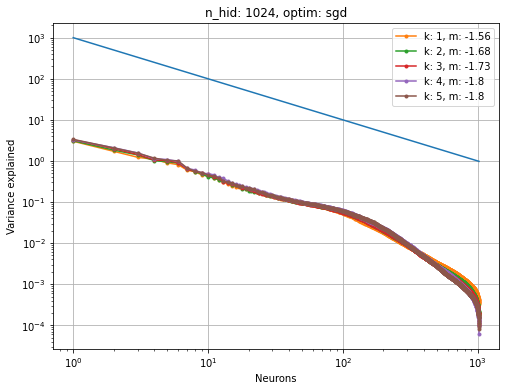

In [25]:
n_hid=1024

fig, ax = plt.subplots(figsize=(8, 6))
xx = np.arange(n_hid) + 1
log_xx = np.log(xx)
ax.plot(xx, 1000 * xx ** (-1.0))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Neurons')
ax.set_ylabel('Variance explained')
for k, vv in nfs:
    pca = PCA()
    pca.fit(vv)
    yy = pca.explained_variance_
    log_yy = np.log(yy)
    m, c = np.linalg.lstsq(np.vstack([log_xx, np.ones(len(log_xx))]).T, log_yy, rcond=None)[0]
    ax.plot(xx, yy, '.-', label=f"k: {k}, m: {m:.3}")
plt.legend()
ax.grid()
ax.set_title(f"n_hid: {n_hid}, optim: sgd")

100%|███████████████████████████████████████████████████████████████| 5/5 [00:12<00:00,  2.59s/it]


(0.0, 1000.0)

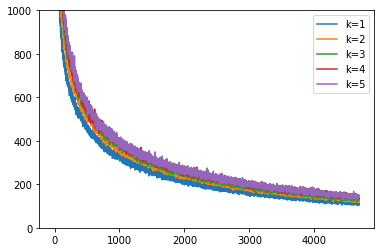

In [31]:
loss = []
recon_loss = []
for filename in tqdm(files):
    with open(filename, "rb") as fp:
        data = pickle.load(fp)
        loss.append((data["k"], data["loss"]))
        recon_loss.append((data["k"], data["recon_loss"]))

fig, ax = plt.subplots()
for k, loss_ in loss:
    ax.plot(loss_, label=f"k={k}")
ax.legend()
ax.set_title(f"n_hid: {n_hid}, optim: sgd")
ax.set_xlabel("Iterations")
ax.set_ylabel("Loss")
plt.ylim(0, 1000)

\begin{align}
E(x, h) = -a^\top x - b^\top h - x^\top W h
\end{align}

\begin{align}
    F(x) &= -\log \sum_h \exp (-E(x, h)) \\
    &= -a^\top x - \sum_j \log (1 + \exp(W^{\top}_jx + b_j))\,.
\end{align}
$h$のサンプリング:
$$ h' \sim  \text{Bernoulli}(\text{Sigmoid}(xW^\top + h))$$
$x$のサンプリング:
$$ x' \sim \text{Bernoulli}(\text{Sigmoid}(hW + x)) $$

(0.0, 0.2)

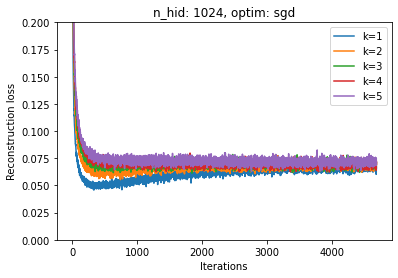

In [34]:
fig, ax = plt.subplots()
for k, recon_loss_ in recon_loss:
    ax.plot(recon_loss_, label=f"k={k}")
ax.legend()
ax.set_title(f"n_hid: {n_hid}, optim: sgd")
ax.set_xlabel("Iterations")
ax.set_ylabel("Reconstruction loss")
ax.set_ylim(0, 0.2)

## 冪指数の相変化

In [13]:
file = query(hid=1024, k=1, optim="sgd")[0]
with open(file, "rb") as fp:
    data = pickle.load(fp)

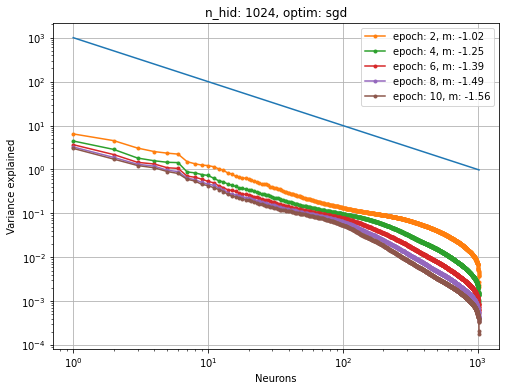

In [14]:
import sklearn
from sklearn.decomposition import PCA
n_hid=1024

fig, ax = plt.subplots(figsize=(8, 6))
xx = np.arange(n_hid) + 1
log_xx = np.log(xx)
ax.plot(xx, 1000 * xx ** (-1.0))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Neurons')
ax.set_ylabel('Variance explained')
for i, vv in enumerate(data["neuron_fireings"]):
    if i % 2 == 0:
        continue
    # vv = sklearn.preprocessing.scale(vv)
    pca = PCA()
    pca.fit(vv)
    yy = pca.explained_variance_
    log_yy = np.log(yy)
    m, c = np.linalg.lstsq(np.vstack([log_xx, np.ones(len(log_xx))]).T, log_yy, rcond=None)[0]
    ax.plot(xx, yy, '.-', label=f"epoch: {i+1}, m: {m:.3}")
plt.legend()
ax.set_title(f"n_hid: {n_hid}, optim: sgd")
ax.grid()

(1e-06, 81714.48122346136)

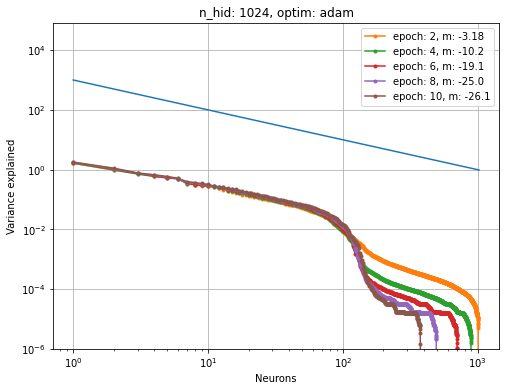

In [9]:
file = query(hid=1024, k=1, optim="adam")[0]
with open(file, "rb") as fp:
    data = pickle.load(fp)
    
import sklearn
from sklearn.decomposition import PCA
n_hid=1024

fig, ax = plt.subplots(figsize=(8, 6))
xx = np.arange(n_hid) + 1
log_xx = np.log(xx)
ax.plot(xx, 1000 * xx ** (-1.0))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Neurons')
ax.set_ylabel('Variance explained')
for i, vv in enumerate(data["neuron_fireings"]):
    if i % 2 == 0:
        continue
    # vv = sklearn.preprocessing.scale(vv)
    pca = PCA()
    pca.fit(vv)
    yy = pca.explained_variance_
    log_yy = np.log(yy)
    m, c = np.linalg.lstsq(np.vstack([log_xx, np.ones(len(log_xx))]).T, log_yy, rcond=None)[0]
    ax.plot(xx, yy, '.-', label=f"epoch: {i+1}, m: {m:.3}")
plt.legend()
ax.set_title(f"n_hid: {n_hid}, optim: adam")
ax.grid()
ax.set_ylim(10 ** (-6))

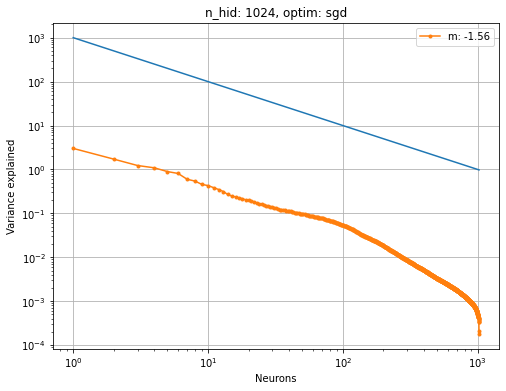

In [15]:
nf = data["neuron_fireings"][-1]
n_hid=1024

fig, ax = plt.subplots(figsize=(8, 6))
xx = np.arange(n_hid) + 1
log_xx = np.log(xx)
ax.plot(xx, 1000 * xx ** (-1.0))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Neurons')
ax.set_ylabel('Variance explained')

# vv = sklearn.preprocessing.scale(vv)
pca = PCA()
pca.fit(vv)
yy = pca.explained_variance_
log_yy = np.log(yy)
m, c = np.linalg.lstsq(np.vstack([log_xx, np.ones(len(log_xx))]).T, log_yy, rcond=None)[0]
ax.plot(xx, yy, '.-', label=f"m: {m:.3}")

plt.legend()
ax.set_title(f"n_hid: {n_hid}, optim: sgd")
ax.grid()

[0.11071621 0.06314724 0.04517753 0.04001423 0.03287632 0.02979391
 0.02195648 0.01998699 0.01679284 0.01578414]


<BarContainer object of 1024 artists>

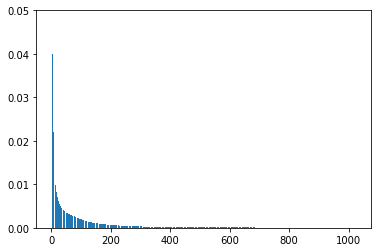

In [23]:
print(pca.explained_variance_ratio_[:10])
plt.ylim(0, 0.05)
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)

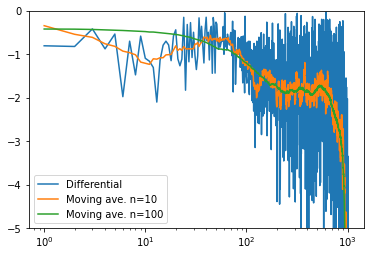

In [16]:
del_log_xx = np.diff(log_xx)
del_log_yy = np.diff(log_yy)
mm = np.divide(del_log_yy, del_log_xx)
plt.ylim(-5, 0)
plt.xscale('log')
plt.plot(xx[:-1], mm, label="Differential")

b=np.ones(10)/10
b2 = np.ones(100)/100

mm10 = np.convolve(mm, b, mode='same')
mm100 = np.convolve(mm, b2, mode='same')
plt.plot(xx[:-1], mm10, label="Moving ave. n=10")
plt.plot(xx[:-1], mm100, label="Moving ave. n=100")
plt.legend()

In [ ]:
del_log_xx = np.diff(log_xx)
del_log_yy = np.diff(log_yy)
mm = np.divide(del_log_yy, del_log_xx)
plt.ylim(-5, 0)
plt.xscale('log')
plt.plot(xx[:-1], mm, label="Differential")



plt.legend()

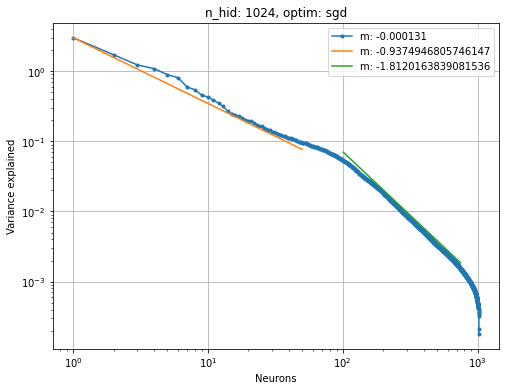

In [119]:
nf = data["neuron_fireings"][-1]
n_hid=1024

fig, ax = plt.subplots(figsize=(8, 6))
xx = np.arange(n_hid) + 1
log_xx = np.log(xx)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Neurons')
ax.set_ylabel('Variance explained')

# vv = sklearn.preprocessing.scale(vv)
pca = PCA()
pca.fit(vv)
yy = pca.explained_variance_
log_yy = np.log(yy)
m, c = np.linalg.lstsq(np.vstack([xx, np.ones(len(xx))]).T, yy, rcond=None)[0]
ax.plot(xx, yy, '.-', label=f"m: {m:.3}")

m1, c1 = np.linalg.lstsq(np.vstack([log_xx[:50], np.ones(len(log_xx[:50]))]).T, log_yy[:50], rcond=None)[0]
ax.plot(xx[:50], yy[0] * xx[:50] ** m1, label=f"m: {m1}")

m2, c2 = np.linalg.lstsq(np.vstack([log_xx[100:750], np.ones(len(log_xx[100:750]))]).T, log_yy[100:750], rcond=None)[0]
ax.plot(xx[100:750],  300 * xx[100:750] ** m2, label=f"m: {m2}")
plt.legend()
ax.set_title(f"n_hid: {n_hid}, optim: sgd")
ax.grid()

## 巨大システムサイズ

In [4]:
import pickle
import sklearn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

files = query(hid=None, k=1, optim="sgd")
files = files[:-1] # Memory error for 10 ** 14
print(files)
nfs = []
for file in tqdm(files):
    with open(file, "rb") as fp:
        data = pickle.load(fp)

    nfs.append((data["n_hid"], data["neuron_fireings"][-1]))
    

['/data2/shinzato/rbm/neuron_firings/hid_1024.k_1.optim_sgd.pickle', '/data2/shinzato/rbm/neuron_firings/hid_256.k_1.optim_sgd.pickle', '/data2/shinzato/rbm/neuron_firings/hid_512.k_1.optim_sgd.pickle', '/data2/shinzato/rbm/neuron_firings/hid_2048.k_1.optim_sgd.pickle', '/data2/shinzato/rbm/neuron_firings/hid_4096.k_1.optim_sgd.pickle', '/data2/shinzato/rbm/neuron_firings/hid_8192.k_1.optim_sgd.pickle']


100%|████████████████████████| 6/6 [02:37<00:00, 26.20s/it]


Text(0.5, 1.0, 'n_hid: 8192, optim: sgd')

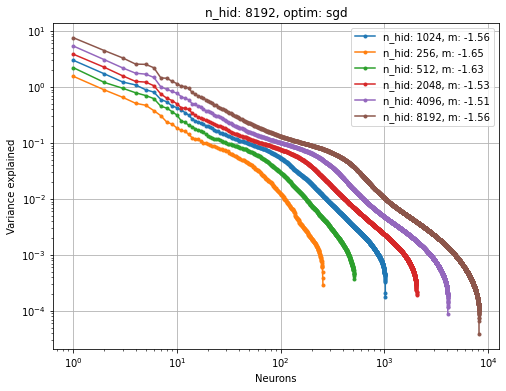

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Neurons')
ax.set_ylabel('Variance explained')
for n_hid, vv in nfs:
    xx = np.arange(n_hid) + 1
    log_xx = np.log(xx)
    pca = PCA()
    pca.fit(vv)
    yy = pca.explained_variance_
    log_yy = np.log(yy)
    m, c = np.linalg.lstsq(np.vstack([log_xx, np.ones(len(log_xx))]).T, log_yy, rcond=None)[0]
    ax.plot(xx, yy, '.-', label=f"n_hid: {n_hid}, m: {m:.3}")
plt.legend()
ax.grid()
ax.set_title(f"n_hid: {n_hid}, optim: sgd")

In [ ]:
## 学習則